In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv('./Datasets/OnlineRetail.csv',encoding='Latin')

In [81]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [83]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [84]:
df.shape

(541909, 8)

In [85]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [86]:
print(df['Country'].value_counts())

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [87]:
df.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T

,count,mean,std,min,0%,5%,50%,95%,99%,100%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,-80995.00,1.00,3.00,29.00,100.0,80995.0,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,-11062.06,0.42,2.08,9.95,18.0,38970.0,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,12346.00,12626.00,15152.00,17905.00,18212.0,18287.0,18287.0


In [88]:
# Let's detect and remove outliers

q1 = df['Quantity'].quantile(0.01)
q3 = df['Quantity'].quantile(0.99)
iqr = q3-q1

lb = q1 - (1.5 * iqr)
ub = q3 + (1.5 * iqr)

print("q1", q1)
print("q3", q3)
print("iqr", iqr)
print("lb", lb)
print("ub", ub)

q1 -2.0
q3 100.0
iqr 102.0
lb -155.0
ub 253.0


In [89]:
df.loc[df['Quantity']> ub, 'Quantity'] = ub
df.loc[df['Quantity'] < lb, 'Quantity'] = lb

{'whiskers': [<matplotlib.lines.Line2D at 0x160dae2d730>,
 'caps': [<matplotlib.lines.Line2D at 0x160cfb8f8f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x160dae2e150>],
 'medians': [<matplotlib.lines.Line2D at 0x160cfb8d610>],
 'fliers': [<matplotlib.lines.Line2D at 0x160cfb8c650>],
 'means': []}

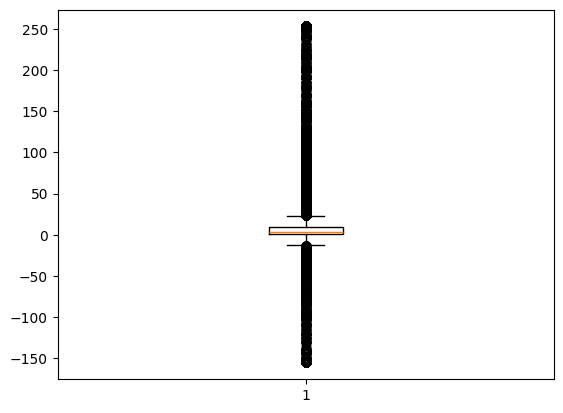

In [90]:
plt.boxplot(df['Quantity'])

In [91]:
q1 = df['UnitPrice'].quantile(0.01)
q3 = df['UnitPrice'].quantile(0.99)
iqr = q3-q1

lb = q1 - (1.5 * iqr)
ub = q3 + (1.5 * iqr)

print("q1", q1)
print("q3", q3)
print("iqr", iqr)
print("lb", lb)
print("ub", ub)

q1 0.19
q3 18.0
iqr 17.81
lb -26.524999999999995
ub 44.714999999999996


In [92]:
df.loc[df['UnitPrice']> ub, 'UnitPrice'] = ub
df.loc[df['UnitPrice'] < lb, 'UnitPrice'] = lb

{'whiskers': [<matplotlib.lines.Line2D at 0x160cfb4fad0>,
 'caps': [<matplotlib.lines.Line2D at 0x160cfb4da30>,
 'boxes': [<matplotlib.lines.Line2D at 0x160cfb4c650>],
 'medians': [<matplotlib.lines.Line2D at 0x160cfb4b650>],
 'fliers': [<matplotlib.lines.Line2D at 0x160cfb4a690>],
 'means': []}

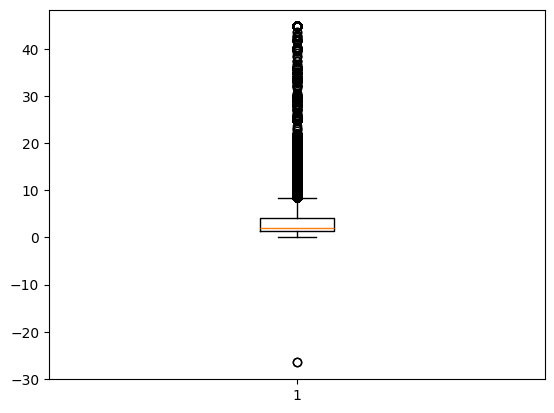

In [93]:
plt.boxplot(df['UnitPrice'])

In [94]:
df.describe([0, 0.05, 0.5, 0.99, 1]).T

,count,mean,std,min,0%,5%,50%,99%,100%,max
Quantity,541909.0,9.130489,22.300513,-155.000,-155.000,1.00,3.00,100.0,253.000,253.000
UnitPrice,541909.0,3.368006,4.116091,-26.525,-26.525,0.42,2.08,18.0,44.715,44.715
CustomerID,406829.0,15287.690570,1713.600303,12346.000,12346.000,12626.00,15152.00,18212.0,18287.000,18287.000


In [95]:
df = df[(df['Quantity'] >= 0) & (df['UnitPrice'] >= 0)]

<Axes: >

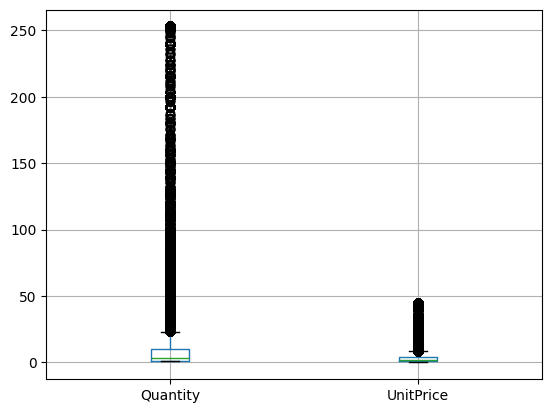

In [96]:
df.boxplot(['Quantity','UnitPrice'])

In [97]:
df = df[df['Quantity'] < 150]

In [98]:
df.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T

,count,mean,std,min,0%,5%,50%,95%,99%,100%,max
Quantity,528418.0,8.431972,14.776869,1.0,1.0,1.00,3.00,25.00,96.00,149.000,149.000
UnitPrice,528418.0,3.347981,3.992863,0.0,0.0,0.42,2.08,9.95,16.98,44.715,44.715
CustomerID,395221.0,15293.213842,1712.276647,12347.0,12347.0,12627.00,15157.00,17904.00,18212.00,18287.000,18287.000


In [99]:
df['CustomerID'] = df['CustomerID'].fillna(0)

In [100]:
df.isnull().sum()

InvoiceNo        0
StockCode        0
Description    554
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID       0
Country          0
dtype: int64

In [101]:
df.dropna(subset=['Description'],inplace=True)

In [102]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [103]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 527864 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    527864 non-null  object 
 1   StockCode    527864 non-null  object 
 2   Description  527864 non-null  object 
 3   Quantity     527864 non-null  int64  
 4   InvoiceDate  527864 non-null  object 
 5   UnitPrice    527864 non-null  float64
 6   CustomerID   527864 non-null  float64
 7   Country      527864 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.2+ MB


In [105]:
# df = pd.get_dummies(df,columns=['Country'], drop_first=True)

In [106]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [107]:
df.shape

(527864, 8)

In [108]:
df = df[~df['InvoiceNo'].str.startswith('C', na=False)]


In [109]:
df['Description'] = df['Description'].str.lower()

In [110]:
df['Description']

0          white hanging heart t-light holder
1                         white metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4              red woolly hottie white heart.
                         ...                 
541904            pack of 20 spaceboy napkins
541905           children's apron dolly girl 
541906          childrens cutlery dolly girl 
541907        childrens cutlery circus parade
541908          baking set 9 piece retrospot 
Name: Description, Length: 527864, dtype: object

In [111]:
df = df[df['Country'] == 'United Kingdom']

In [112]:
df.shape

(483577, 8)

In [113]:
df = df.drop_duplicates()

In [114]:
df.shape

(478435, 8)

In [115]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [116]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,white hanging heart t-light holder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [117]:
df['Description'].value_counts()[:10]

Description
white hanging heart t-light holder    2198
jumbo bag red retrospot               1907
regency cakestand 3 tier              1698
party bunting                         1596
lunch bag red retrospot               1408
assorted colour bird ornament         1346
set of 3 cake tins pantry design      1245
lunch bag  black skull.               1243
natural slate heart chalkboard        1224
heart of wicker small                 1174
Name: count, dtype: int64

In [118]:
df['CustomerID'].value_counts().iloc[:10]

CustomerID
0.0        131198
17841.0      7674
14096.0      5111
12748.0      4403
14606.0      2677
15311.0      2348
13089.0      1806
13263.0      1667
14298.0      1608
15039.0      1475
Name: count, dtype: int64

In [119]:
df['InvoiceDate']

0          12/1/2010 8:26
1          12/1/2010 8:26
2          12/1/2010 8:26
3          12/1/2010 8:26
4          12/1/2010 8:26
               ...       
541889    12/9/2011 12:31
541890    12/9/2011 12:49
541891    12/9/2011 12:49
541892    12/9/2011 12:49
541893    12/9/2011 12:49
Name: InvoiceDate, Length: 478435, dtype: object

In [120]:
months = df['InvoiceDate'].str.split().str[0].str.split('/').str[0]

In [121]:
hours = df['InvoiceDate'].str.split().str[1].str.split(':').str[0]

(array([ 92844.,  24583.,  32206.,  26948.,  32553.,  32008.,  34816.,
         30101.,  44113., 128263.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

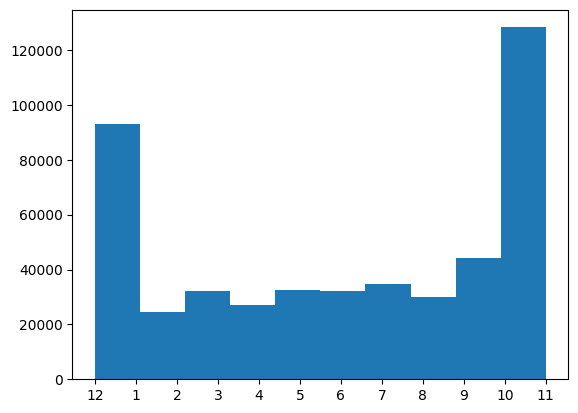

In [127]:
plt.hist(months)

(array([ 35046.,  40376., 120121.,  63545.,  59106., 122423.,  26226.,
          7656.,   3173.,    763.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <BarContainer object of 10 artists>)

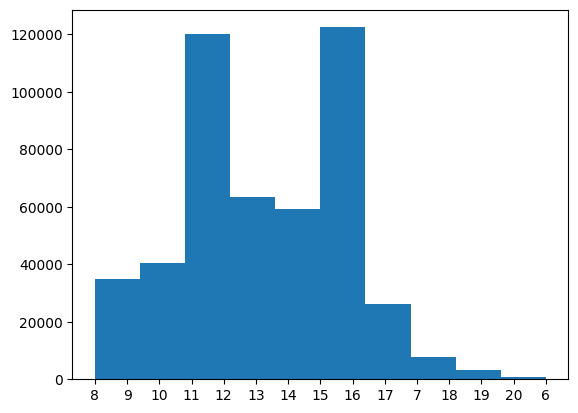

In [130]:
plt.hist(hours)